###Importing the libraries

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Importing the dataset

In [466]:
dataset = pd.read_csv('oasis_data.csv')

In [467]:
dataset.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,class
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NonDemented
1,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,VeryMildDemented
2,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NonDemented
3,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NonDemented
4,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN,NonDemented


In [468]:
dataset.tail()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,class
239,OAS1_0156_MR2,F,R,20,NaN,NaN,NaN,NaN,1577,0.832,1.113,12.0,NonDemented
240,OAS1_0202_MR2,F,R,23,NaN,NaN,NaN,NaN,1548,0.861,1.134,21.0,NonDemented
241,OAS1_0230_MR2,F,R,19,NaN,NaN,NaN,NaN,1577,0.849,1.113,24.0,NonDemented
242,OAS1_0249_MR2,F,R,28,NaN,NaN,NaN,NaN,1215,0.865,1.444,3.0,NonDemented
243,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0,NonDemented


###Basic EDA

In [469]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      244 non-null    object 
 1   M/F     244 non-null    object 
 2   Hand    244 non-null    object 
 3   Age     244 non-null    int64  
 4   Educ    121 non-null    float64
 5   SES     116 non-null    float64
 6   MMSE    121 non-null    float64
 7   CDR     121 non-null    float64
 8   eTIV    244 non-null    int64  
 9   nWBV    244 non-null    float64
 10  ASF     244 non-null    float64
 11  Delay   10 non-null     float64
 12  class   244 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 24.9+ KB


In [470]:
dataset.shape

(244, 13)

In [471]:
dataset.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,244.000000,121.000000,116.000000,121.000000,121.000000,244.000000,244.000000,244.000000,10.00000
mean,49.368852,3.264463,2.508621,28.016529,0.148760,1486.549180,0.799648,1.195865,18.10000
std,24.295235,1.269965,1.138234,2.963622,0.307169,158.661511,0.054888,0.128109,20.11329
min,18.000000,1.000000,1.000000,15.000000,0.000000,1131.000000,0.644000,0.920000,1.00000
25%,23.000000,2.000000,1.750000,28.000000,0.000000,1369.500000,0.756750,1.104750,3.50000
50%,48.000000,3.000000,2.500000,29.000000,0.000000,1476.000000,0.819500,1.190000,11.00000
75%,72.000000,4.000000,3.250000,30.000000,0.000000,1590.000000,0.843250,1.283500,23.25000
max,94.000000,5.000000,5.000000,30.000000,2.000000,1908.000000,0.893000,1.551000,64.00000


In [472]:
int(dataset.duplicated().sum())

0

###Ckecking missing values

In [473]:
print(pd.isnull(dataset).sum())

ID         0
M/F        0
Hand       0
Age        0
Educ     123
SES      128
MMSE     123
CDR      123
eTIV       0
nWBV       0
ASF        0
Delay    234
class      0
dtype: int64


###Checking balance of dataset

In [474]:
count = dataset['class'].value_counts()
print(count)

class
NonDemented         215
VeryMildDemented     24
MildDemented          4
ModerateDemented      1
Name: count, dtype: int64


In [475]:
ratio = count.max()/count.min()
if ratio <= 1.5:
  print('The dataset is balanced')
elif ratio <= 3:
  print('The dataset is moderately imbalanced')
else:
  print('The dataset is highly imbalanced')

The dataset is highly imbalanced


<Axes: xlabel='count', ylabel='class'>

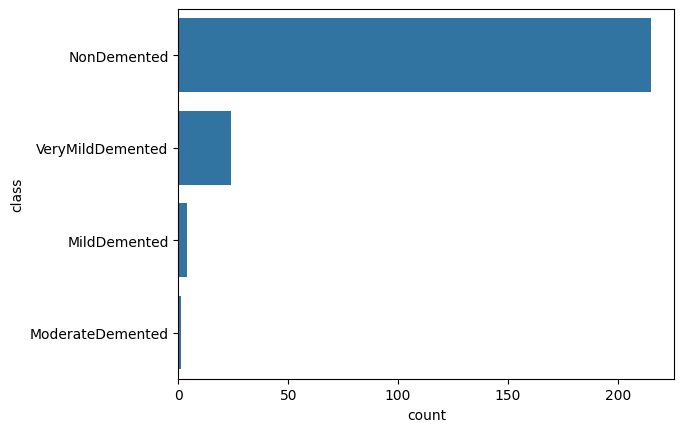

In [476]:
sns.countplot(y='class', data=dataset)

###Features and target

In [477]:
x = dataset.drop(['ID', 'class'], axis=1)
x.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
2,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
3,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
4,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN


In [478]:
y = dataset['class']
y.head()

,class
0,NonDemented
1,VeryMildDemented
2,NonDemented
3,NonDemented
4,NonDemented


###Splitting the data into train and test

In [479]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###Filling missing values

In [480]:
print(pd.isnull(x_train).sum())

M/F        0
Hand       0
Age        0
Educ     100
SES      103
MMSE     100
CDR      100
eTIV       0
nWBV       0
ASF        0
Delay    186
dtype: int64


In [481]:
print(pd.isnull(x_test).sum())

M/F       0
Hand      0
Age       0
Educ     23
SES      25
MMSE     23
CDR      23
eTIV      0
nWBV      0
ASF       0
Delay    48
dtype: int64


In [482]:
from sklearn.impute import SimpleImputer
num_values = [3,4,5,6,10]
imputer = SimpleImputer(strategy='mean')
x_train.iloc[:, num_values] = imputer.fit_transform(x_train.iloc[:, num_values])
x_test.iloc[:, num_values] = imputer.transform(x_test.iloc[:, num_values])

In [483]:
print(pd.isnull(x_train).sum())

M/F      0
Hand     0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Delay    0
dtype: int64


In [484]:
print(pd.isnull(x_test).sum())

M/F      0
Hand     0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Delay    0
dtype: int64


In [485]:
print(pd.isnull(y_train).sum())

0


In [486]:
print(pd.isnull(y_test).sum())

0


###Encoding categorical values

In [487]:
for column in x.columns:
    if dataset[column].dtype == 'object':
        print(column)

M/F
Hand


In [488]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.transform(x_test))

###Feature scaling

In [489]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Balancing the dataset

In [490]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

y_train_res.value_counts()

,count
class,
NonDemented,174
VeryMildDemented,174
ModerateDemented,174
MildDemented,174


In [491]:
x_train_res

array([[ 7.31732923e-01, -7.31732923e-01,  0.00000000e+00, ...,
         1.03178704e+00, -4.09746659e-01,  1.40520985e-14],
       [ 7.31732923e-01, -7.31732923e-01,  0.00000000e+00, ...,
         9.76527912e-01,  7.92664181e-01,  1.40520985e-14],
       [-1.36661884e+00,  1.36661884e+00,  0.00000000e+00, ...,
         2.58159294e-01, -6.32710258e-01,  1.40520985e-14],
       ...,
       [ 7.31732923e-01, -7.31732923e-01,  0.00000000e+00, ...,
        -1.98904510e+00,  2.12248279e+00,  1.40520985e-14],
       [ 7.31732923e-01, -7.31732923e-01,  0.00000000e+00, ...,
        -1.17857794e+00,  7.36923281e-01,  1.40520985e-14],
       [ 7.31732923e-01, -7.31732923e-01,  0.00000000e+00, ...,
        -1.98904510e+00,  2.12248279e+00,  1.40520985e-14]])

In [492]:
y_train_res

,class
0,NonDemented
1,NonDemented
2,NonDemented
3,NonDemented
4,NonDemented
...,...
691,VeryMildDemented
692,VeryMildDemented
693,VeryMildDemented
694,VeryMildDemented


In [493]:
x_train_res = pd.DataFrame(x_train_res)
y_train_res = pd.DataFrame(y_train_res)

balanced_dataset = pd.concat([x_train_res, y_train_res], axis=1)
balanced_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,class
0,0.731733,-0.731733,0.0,-1.085838,1.475939e-15,1.721230e-15,2.182812e-14,-1.706186e-15,0.307031,1.031787,-0.409747,1.405210e-14,NonDemented
1,0.731733,-0.731733,0.0,-0.963422,1.475939e-15,1.721230e-15,2.182812e-14,-1.706186e-15,-0.853995,0.976528,0.792664,1.405210e-14,NonDemented
2,-1.366619,1.366619,0.0,-0.024902,1.475939e-15,1.721230e-15,2.182812e-14,-1.706186e-15,0.548368,0.258159,-0.632710,1.405210e-14,NonDemented
3,-1.366619,1.366619,0.0,-0.718591,1.475939e-15,1.721230e-15,2.182812e-14,-1.706186e-15,0.326599,0.350258,-0.433636,1.405210e-14,NonDemented
4,0.731733,-0.731733,0.0,1.525697,8.046415e-01,5.898055e-01,9.402666e-01,-6.470720e-01,-1.199693,-0.847023,1.222665,1.405210e-14,NonDemented


###Model training

In [495]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(x_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

###Checking overfitting

In [496]:
train_score = classifier.score(x_train_res, y_train_res)
test_score = classifier.score(x_test, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 1.0
Test score: 0.9795918367346939


In [497]:
gap = abs(train_score - test_score)
print(f"The gap is: {gap}.")

if gap <= 0.05:
  print("The model is very well no overfitting.")
elif gap <= 0.1:
  print("The model is slightly overfitting.")
else:
  print("The model is overfitting.")

The gap is: 0.020408163265306145.
The model is very well no overfitting.


###Prediction

In [498]:
y_pred = classifier.predict(x_test)

In [499]:
y_pred

array(['NonDemented', 'VeryMildDemented', 'VeryMildDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented',
       'NonDemented', 'MildDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'VeryMildDemented', 'NonDemented',
       'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'VeryMildDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'NonDemented',
       'NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented',
       'NonDemented', 'NonDemented', 'NonDemented'], dtype=object)

###Confusion matrix

<Axes: >

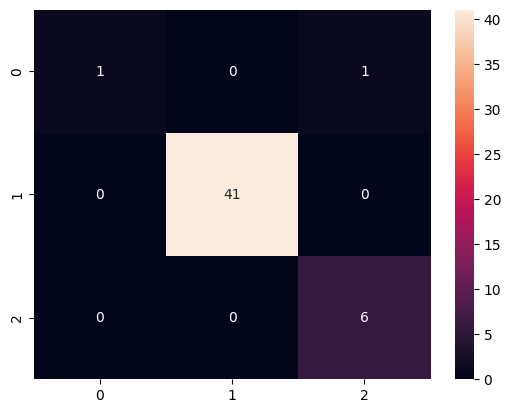

In [500]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

###Classification report

In [501]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    MildDemented       1.00      0.50      0.67         2
     NonDemented       1.00      1.00      1.00        41
VeryMildDemented       0.86      1.00      0.92         6

        accuracy                           0.98        49
       macro avg       0.95      0.83      0.86        49
    weighted avg       0.98      0.98      0.98        49



###Cross validation


In [502]:
from sklearn.model_selection import cross_val_score
y_train = y_train.values.ravel()
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print(accuracies)

[1.         1.         0.9        0.9        0.9        1.
 1.         0.94736842 1.         0.94736842]


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


###Accuracy

In [503]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"The accuracy of the model is: {accuracy}%")

The accuracy of the model is: 97.96%
